<a href="https://colab.research.google.com/github/Gaukm01/BCS-SER-project/blob/main/LSTM_Model_for_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/BCS/audio_speech_actors_01-24"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import librosa
import IPython.display as ipd
import librosa.display
import sklearn


In [4]:
temp="/content/drive/MyDrive/BCS/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav"
x,sr=librosa.load(temp)
ipd.Audio(x,rate=sr)

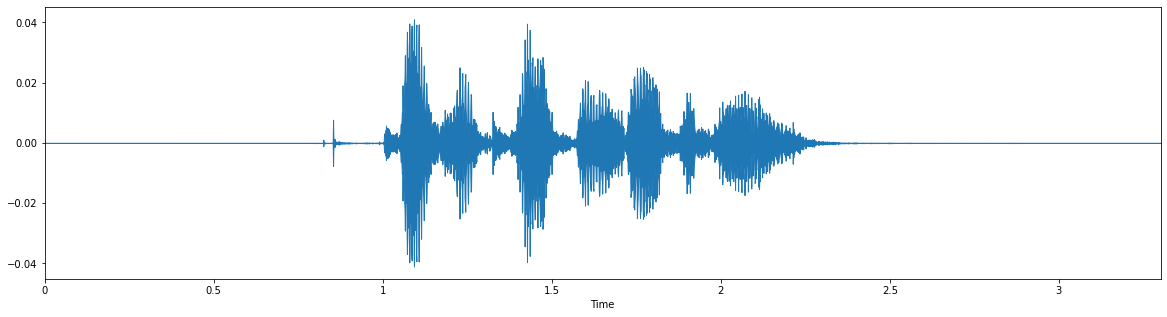

In [5]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(x,sr=sr)

(20, 143)


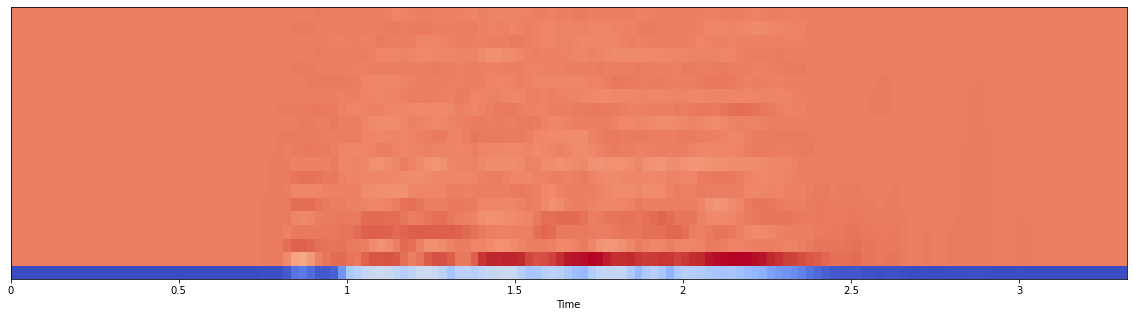

In [6]:
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x,sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs,sr=sr,x_axis="time")


In [7]:
mfccs=sklearn.preprocessing.scale(mfccs,axis=1)
print(mfccs)

[[-0.87174416 -0.87174416 -0.87174416 ... -0.87174416 -0.87174416
  -0.87174416]
 [-0.7631331  -0.7631331  -0.7631331  ... -0.7631331  -0.7631331
  -0.7631331 ]
 [-0.01678085 -0.01678085 -0.01678085 ... -0.01678085 -0.01678085
  -0.01678085]
 ...
 [ 0.30031854  0.30031854  0.30031854 ...  0.30031854  0.30031854
   0.30031854]
 [ 0.25631914  0.25631914  0.25631914 ...  0.25631914  0.25631914
   0.25631914]
 [ 0.19825366  0.19825366  0.19825366 ...  0.19825366  0.19825366
   0.19825366]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [8]:
emotion=[]
gender=[]
actor=[]
file_path=[]
import os
for filename in os.listdir(path):
  path2=os.path.join(path,filename)

  for file in os.listdir(path2):
   part=file.split('.')[0].split('-')
   emotion.append(int(part[2]))
   actor.append(int(part[6]))
   if int(part[6])%2==0:
     gender.append("male")
   else :
     gender.append("female")
   file_path.append(path2+'/'+file)

new_df = pd.DataFrame(emotion)
new_df = new_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
new_df = pd.concat([pd.DataFrame(gender), new_df,pd.DataFrame(actor)], axis=1)
new_df.columns = ['gender','emotion','actor']
new_df = pd.concat([new_df, pd.DataFrame(file_path, columns = ['path'])],axis=1)
print(new_df)
   

      gender  ...                                               path
0       male  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
1       male  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
2       male  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
3       male  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
4       male  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
...      ...  ...                                                ...
1435  female  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
1436  female  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
1437  female  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
1438  female  ...  /content/drive/MyDrive/BCS/audio_speech_actors...
1439  female  ...  /content/drive/MyDrive/BCS/audio_speech_actors...

[1440 rows x 4 columns]


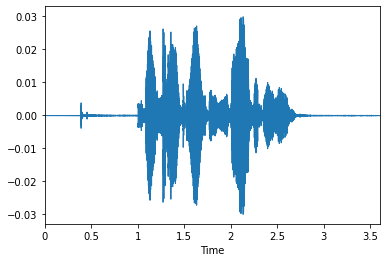

In [9]:
x, sr=librosa.load(new_df.path[0])
librosa.display.waveplot(x,sr=sr)

In [10]:
df = pd.DataFrame(columns=['MFCC'])
count=0
for path in new_df.path:
    # Load audio and set the duration to 2.75sec so that we get MFCC array of same shape
    X, sample_rate = librosa.load(path, duration=2.75)
    # MFCC
    # n_fcc is for number of properties in MFCC array
    mfccs = librosa.feature.mfcc(X, sr = sample_rate, hop_length=512, n_mfcc=20)
    # Get the mean of columns
    mean = np.mean(mfccs.T, axis = 0)
    df.loc[count] = [mean]

    count = count+1
df.head()

,MFCC
0,"[-645.75714, 57.79723, -27.110634, 15.822221, ..."
1,"[-704.7665, 54.016422, -24.447716, 9.267882, -..."
2,"[-663.76685, 65.56084, -3.8372488, 5.6348643, ..."
3,"[-708.587, 44.129375, -4.3217573, 11.149389, -..."
4,"[-670.22375, 53.669384, -17.86443, 9.573667, -..."


In [11]:
combined_df = pd.concat([new_df,df],axis=1)
print(combined_df)
train_X,test_X,train_y,test_y = train_test_split(combined_df["MFCC"],combined_df["gender"],test_size=0.3,random_state=0)
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)
train_X=pd.DataFrame(train_X.values.tolist())
test_X=pd.DataFrame(test_X.values.tolist())
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

      gender  ...                                               MFCC
0       male  ...  [-645.75714, 57.79723, -27.110634, 15.822221, ...
1       male  ...  [-704.7665, 54.016422, -24.447716, 9.267882, -...
2       male  ...  [-663.76685, 65.56084, -3.8372488, 5.6348643, ...
3       male  ...  [-708.587, 44.129375, -4.3217573, 11.149389, -...
4       male  ...  [-670.22375, 53.669384, -17.86443, 9.573667, -...
...      ...  ...                                                ...
1435  female  ...  [-549.07007, 79.03827, -3.6887228, 26.907488, ...
1436  female  ...  [-450.54437, 57.967827, -18.284353, 13.442745,...
1437  female  ...  [-618.5289, 62.47535, 6.869471, 23.727352, 7.3...
1438  female  ...  [-463.6936, 54.333275, -4.98259, 13.446028, 2....
1439  female  ...  [-486.76956, 56.95284, -8.251724, 11.253826, 5...

[1440 rows x 5 columns]
(1008,) (432,) (1008,) (432,)
(1008, 20) (432, 20) (1008,) (432,)


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

mean = np.mean(train_X, axis=0)
#print(mean.shape)
std = np.std(train_X, axis=0)
train_X = (train_X - mean)/std
test_X = (test_X - mean)/std

#np array
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

#one_hot encode
encoder = OneHotEncoder()
train_y = np.array(train_y).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)
train_y= encoder.fit_transform(train_y).toarray()
test_y = encoder.fit_transform(test_y).toarray()
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

#scaler fit
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

(1008, 20) (432, 20) (1008,) (432,)
(1008, 20) (432, 20) (1008, 2) (432, 2)
(1008, 20) (432, 20) (1008, 2) (432, 2)


In [13]:
import tensorflow as tf

In [14]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [15]:
def build_lstm_model(shp=(20,1), num_class=8):
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.LSTM(512, activation='linear',return_sequences=True, input_shape=(train_X.shape[1],1), dropout=0.1, recurrent_dropout=0.2))
 model.add(tf.keras.layers.LSTM(512,activation='tanh', return_sequences=True,dropout=0.1,recurrent_dropout=0.2))
 model.add(tf.keras.layers.LSTM(128,activation='linear',return_sequences=True,dropout=0.1,recurrent_dropout=0.2))
 model.add(tf.keras.layers.Flatten())
 model.add(tf.keras.layers.Dense(64))
 model.add(tf.keras.layers.Dense(train_y.shape[1],activation='Softmax'))
 return model

In [16]:
print(train_X.shape,train_y.shape,test_X.shape,test_y.shape)
model=build_lstm_model()
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
csv_logger = tf.keras.callbacks.CSVLogger('model_history.log', separator=',', append=False)
history=model.fit(train_X,train_y,epochs=1000,batch_size=256,validation_data=(test_X,test_y),callbacks=[csv_logger])
model.summary()

(1008, 20, 1) (1008, 2) (432, 20, 1) (432, 2)
Epoch 1/1000
4/4 [==============================] - 10s 474ms/step - loss: 1.2570 - accuracy: 0.5625 - val_loss: 0.4779 - val_accuracy: 0.7847
Epoch 2/1000
4/4 [==============================] - 1s 267ms/step - loss: 0.4003 - accuracy: 0.8343 - val_loss: 0.4221 - val_accuracy: 0.8356
Epoch 3/1000
4/4 [==============================] - 1s 283ms/step - loss: 0.3732 - accuracy: 0.8442 - val_loss: 0.3976 - val_accuracy: 0.8310
Epoch 4/1000
4/4 [==============================] - 1s 269ms/step - loss: 0.3726 - accuracy: 0.8591 - val_loss: 0.4011 - val_accuracy: 0.8472
Epoch 5/1000
4/4 [==============================] - 1s 260ms/step - loss: 0.3916 - accuracy: 0.8423 - val_loss: 0.4140 - val_accuracy: 0.8310
Epoch 6/1000
4/4 [==============================] - 1s 263ms/step - loss: 0.3603 - accuracy: 0.8562 - val_loss: 0.3925 - val_accuracy: 0.8356
Epoch 7/1000
4/4 [==============================] - 1s 274ms/step - loss: 0.3734 - accuracy: 0.8552 -

In [17]:
!pip install plot_keras_history
from plot_keras_history import plot_history
import matplotlib.pyplot as plt


  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.29-cp37-none-any.whl size=8614 sha256=b3c79b45e88fe62c76933fb45f9605b9ffee94894761a53a7f74408d1f6bfd96
  Stored in directory: /root/.cache/pip/wheels/8b/cb/fb/cbeba24d72e736b8987b7d0dc37afc0e76f3c16e544ceff727
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.26-cp37-none-any.whl size=7610 sha256=089d2a669cc7345336a3c6b72908d87d99a7dd3fc5a822d410a06645902300a2
  Stored in directory: /root/.cache/pip/wheels/2a/62/31/d348320becc60729f508a2c5aad445b94d7543c5cb577cfb9d
  Created wheel for compress-json: filename=compress_json-1.0.4-cp37-none-any.whl size=4586 sha256=65d681c357be91b8a3b2fcbcf8aaeadf286aba744af40429dc29a1f4273b60dd
  Stored in directory: /root/.cache/pip/wheels/83/ec/21/51460dd508e4a152c0643946c21fae84eb3391171164d35745
Successfully built plot-keras-history sanitize-ml-labels compress-json


14/14 [==============================] - 0s 24ms/step - loss: 0.4801 - accuracy: 0.9722


[0.4801065921783447, 0.9722222089767456]

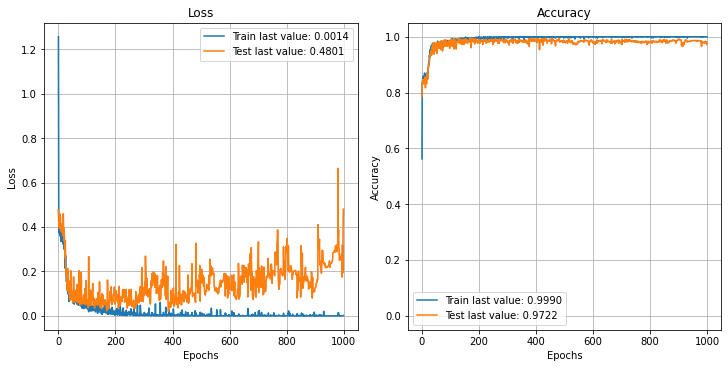

In [18]:
plot_history(history)
model.evaluate(test_X,test_y)